### Randomization and Bootstrapping

Danu Caus, Massimo Innocentini and Nambiar Shruti Surendrakumar

In [1]:
# Importing required libraries
import math
from random import choice, shuffle, seed
from scipy import stats
from scipy.stats import distributions as dists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stat

%matplotlib inline

np.random.seed(1234567)
seed(1234567)

### 1. Randomization on caffiene finger tap data

The null hypothesis states that the median number of taps is the same for both caffiene and no-caffiene samples i.e. two samples come from a population with the same median.

H0: median0 = median1 

The alternative hypothesis states that there is a difference in the median number of taps between the caffiene and no-caffiene samples.

H1: median0 != median1 

CAFFIENE 
              Taps
count   10.000000
mean   248.300000
std      2.213594
min    245.000000
25%    246.500000
50%    248.000000
75%    250.000000
max    252.000000

NO CAFFIENE 
              Taps
count   10.000000
mean   244.800000
std      2.394438
min    242.000000
25%    242.500000
50%    244.500000
75%    246.750000
max    248.000000

Difference in the median:  3.5


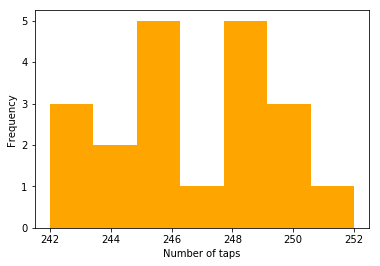

In [2]:
# Reading the caffeine taps data
df1 = pd.read_csv('CaffeineTaps.csv', index_col = 0)
caffiene_data = df1[df1.Group=='Caffeine']
no_caffiene_data = df1[df1.Group=='NoCaffeine']
diff_median = caffiene_data.Taps.median() - no_caffiene_data.Taps.median()

print("CAFFIENE", '\n', caffiene_data.describe())
print("\nNO CAFFIENE", '\n', no_caffiene_data.describe())
print("\nDifference in the median: ", diff_median)

ax = df1.Taps.plot.hist(bins= 7, color='orange')
ax.set_xlabel("Number of taps")

The difference in median values between the caffiene and no-caffiene samples is 3.5. To determine the probability that this difference arose by chance, we find a distribution of the values of median differences that could arise by chance under the null hypothesis that the median number of taps is no more variable when a person has consumed caffeinated drinks than when they have not. 

We calculate the p-value i.e. the probability of obtaining a difference in median at least as large as observed at random, if the two samples did come from the same population.

In [3]:
def randomization_sample(data, K=1000, N1=10, N2=10):
    sampling_dist = []
    samples = pd.DataFrame()
    
    for i in range(K):
        shuffled_data = data.tolist()
        
        # Shuffling the data to sample without replacement
        shuffle(shuffled_data)
        
        s1 = pd.Series(shuffled_data[:10]) 
        s2 = pd.Series(shuffled_data[10:]) 
        
        samples = samples.append(pd.Series(shuffled_data), ignore_index=True)
        
        # Using difference between the two sample median values
        sampling_dist.append(s1.median() - s2.median())
        
    print(samples.head(3))
    return pd.Series(sampling_dist)


FIRST 3 RANDOMIZED SAMPLES (at K=1000, N1=10, N2=10)
      0      1      2      3      4      5      6      7      8      9   \
0  248.0  248.0  244.0  252.0  250.0  242.0  246.0  244.0  245.0  245.0   
1  248.0  250.0  250.0  250.0  246.0  242.0  246.0  248.0  242.0  248.0   
2  250.0  242.0  248.0  250.0  242.0  244.0  252.0  245.0  244.0  248.0   

      10     11     12     13     14     15     16     17     18     19  
0  247.0  246.0  242.0  250.0  248.0  246.0  242.0  250.0  248.0  248.0  
1  244.0  252.0  242.0  246.0  245.0  244.0  248.0  248.0  247.0  245.0  
2  248.0  246.0  245.0  248.0  248.0  250.0  246.0  242.0  246.0  247.0  

SUMMARY STATS ON DISTRIBUTION OF SAMPLES MEDIAN DIFFERENCE
count    1000.000000
mean       -0.046500
std         1.789075
min        -3.500000
25%        -2.000000
50%         0.000000
75%         1.500000
max         3.500000
dtype: float64


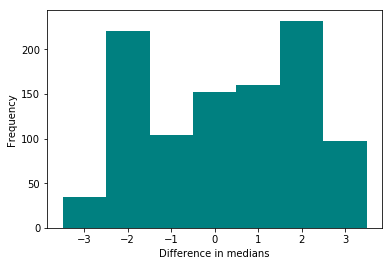

In [4]:
print("\nFIRST 3 RANDOMIZED SAMPLES (at K=1000, N1=10, N2=10)")
randomized_diff_sample_medians = randomization_sample(df1.Taps)

print("\nSUMMARY STATS ON DISTRIBUTION OF SAMPLES MEDIAN DIFFERENCE")
print(randomized_diff_sample_medians.describe())

ax = randomized_diff_sample_medians.plot.hist(bins=7, color='teal')
ax.set_xlabel("Difference in medians")

In [5]:
c1 = randomized_diff_sample_medians.quantile(0.025)
c2 = randomized_diff_sample_medians.quantile(0.975)

p = len(randomized_diff_sample_medians.abs()[lambda x: x >= math.fabs(diff_median)])/len(randomized_diff_sample_medians)

print("Critical Values:", c1, ",", c2, "Sample Result (Test statistic θ - Median difference):", diff_median, "p:", p)

Critical Values: -3.0 , 2.5124999999999886 Sample Result (Test statistic θ - Median difference): 3.5 p: 0.021


To obtain the p-value, we find the proportion of absolute randomized differences that are greater than or equal to the observed difference. The value is found to be smaller than the significance level of 0.05.

Also, the observed value of median difference falls outside the acceptance region. Hence we can reject the null hypothesis.

### 2. Bootstrapping on body fat data


H0: median = 13.5

H1: median != 13.5 

count    100.000000
mean      18.601000
std        8.006683
min        3.700000
25%       12.375000
50%       18.950000
75%       24.575000
max       40.100000
Name: Bodyfat, dtype: float64


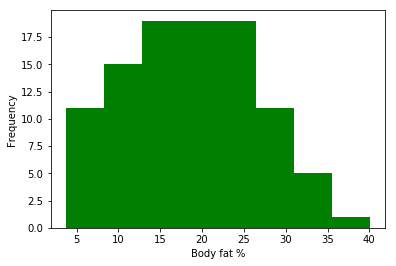

In [6]:
# Reading the body fat data
df2 = pd.read_csv('BodyFat.csv', index_col = 0)

body_fat = df2.Bodyfat
print(body_fat.describe())

ax = body_fat.plot.hist(bins= 8, color='green')
ax.set_xlabel("Body fat %")

In [7]:
def bootstrap_sample(data, K=5000, N=20):
    samples = pd.DataFrame()
    sampling_dist = []
    
    for i in range(K):
        
        # Sampling with replacement
        sample = pd.Series(np.random.choice(data, N, replace=True))
        samples = samples.append(sample, ignore_index=True)
        
        # Using sample's median values
        sampling_dist.append(sample.median())
        
    print(samples.head(3))
    return pd.Series(sampling_dist)


FIRST 3 BOOTSTRAPPED SAMPLES (at K=5000, N=20)
     0     1     2     3     4     5     6     7     8     9     10    11  \
0  11.8  10.6   8.0  25.2  29.4  29.4  14.7  26.0  22.1  16.5  25.3  27.2   
1  31.9  16.5  25.3  24.2   7.8  19.1  20.8  16.0  19.6  22.4  14.8  16.9   
2   9.4  20.8  18.2  27.0  27.2  16.0  10.3  26.7  14.8  32.8  24.8  19.6   

     12    13    14    15    16    17    18    19  
0  22.0  22.6  23.3  19.3  31.6  18.8   8.8   6.3  
1  32.3  26.7   9.9  31.9  18.2  40.1  18.2  11.5  
2  32.3  22.5  21.3   9.4  27.0  27.2  11.3  12.3  

SUMMARY STATS ON DISTRIBUTION OF SAMPLE MEDIANS
count    5000.000000
mean       18.743370
std         2.494873
min        10.300000
25%        16.950000
50%        18.900000
75%        20.600000
max        26.750000
dtype: float64

NORMAL APPROXIMATION METHOD
Standard error:  2.4948734280087983
Critical Values: 9.39629839315 , 17.6037016068
Two-tailed boundary: 1.64485362695 Z: 2.1016577198406576 p: 0.0177916348812

SHIFT METHOD
M

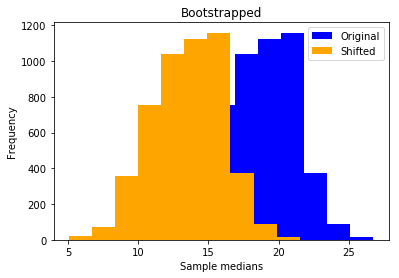

In [8]:
print("\nFIRST 3 BOOTSTRAPPED SAMPLES (at K=5000, N=20)")
body_fat_sampled_medians = bootstrap_sample(body_fat)

print("\nSUMMARY STATS ON DISTRIBUTION OF SAMPLE MEDIANS")
print(body_fat_sampled_medians.describe())

s_h0_median = 13.5
s_boot_median = body_fat_sampled_medians.mean()

# Using the Normal approximation method
print("\nNORMAL APPROXIMATION METHOD")

standard_error = body_fat_sampled_medians.std()
z = (s_boot_median - s_h0_median) / standard_error

critical_value1 = (stats.norm.ppf(0.05) * standard_error) + s_h0_median
critical_value2 = (stats.norm.ppf(0.95) * standard_error) + s_h0_median
print("Standard error: ", standard_error)
print("Critical Values:", critical_value1, ",", critical_value2)
print("Two-tailed boundary:", stats.norm.ppf(0.95), "Z:", z, "p:", stat.norm.sf(abs(z)))

# Using the Shift method to balance the bootstrap (on the H0 median)
print("\nSHIFT METHOD")

median_shift = s_h0_median - s_boot_median
body_fat_sampled_medians_shifted = body_fat_sampled_medians + median_shift
      
ax = body_fat_sampled_medians.plot.hist(color='blue')
ax.set_xlabel("Sample medians")
ax.set_title("Bootstrapped")

body_fat_sampled_medians_shifted.plot.hist(color='orange')
ax.set_xlabel("Sample medians")
ax.legend(["Original", "Shifted"])

c1 = body_fat_sampled_medians_shifted.quantile(0.025)
c2 = body_fat_sampled_medians_shifted.quantile(0.975)

sum_val = len(body_fat_sampled_medians_shifted[lambda x: x>s_boot_median]) + len(body_fat_sampled_medians_shifted[lambda x: x<(s_h0_median+median_shift)])
p = sum_val/len(body_fat_sampled_medians_shifted) 

print("Median shift: ", median_shift)
print("Critical Values:", c1, ",",  c2)
print("Sample result:", s_boot_median, "p:", p)

The critical values are calculated for a one-tailed test at α=0.05

For the Normal approximation method, a Z-test is run. We can reject H0 if Z >= 1.645, which is true in this case as Z= 2.101

By the Shift method, our sample result=18.743 is greater than the critical value 18.057 and falls in the rejection region. 

By both methods, we observe that the p-value is < α=0.05 i.e the probability of attaining this result by chance under H0 is less than the significance level. Hence we can reject the null hypothesis.

### 3. Bootstrapping on caffeine vs. sleep word memory  data

H0: mean_words_coffee = mean_words_sleep

H1: mean_words_coffee != mean_words_sleep

In [9]:
# Reading the sleep caffeine data
df3 = pd.read_csv('SleepCaffeine.csv', index_col = 0)

caff_data = df3[df3.Group=='Caffeine']
sleep_data = df3[df3.Group=='Sleep']

diff_mean = caff_data.Words.mean() - sleep_data.Words.mean()

print("CAFFIENE", '\n', caff_data.describe())
print("\nSLEEP", '\n', sleep_data.describe())
print("\ndiff_mean", diff_mean)

CAFFIENE 
            Words
count  12.000000
mean   12.250000
std     3.545163
min     6.000000
25%    10.000000
50%    12.500000
75%    14.250000
max    18.000000

SLEEP 
           Words
count  12.00000
mean   15.25000
std     3.30633
min     9.00000
25%    13.75000
50%    15.50000
75%    17.25000
max    21.00000

diff_mean -3.0


The difference in mean values between the caffiene and sleep samples, diff_mean, is -3.0. To determine the probability that this difference arose by chance, we find a distribution of the values of diff_mean that could arise by chance under the null hypothesis that the mean number of words is no more variable under caffiene than sleep.

In [10]:
def bootstrap_two_sample(data, N1, N2, K=5000):
    '''
    Using merged sample data to avoid having to do shift/normal approximation
    '''
    sampling_dist = []
    samples1 = pd.DataFrame()
    samples2 = pd.DataFrame()
    
    for i in range(K):
        
        # Sampling with replacement on the merged data
        sample1 = pd.Series(np.random.choice(data, N1, replace=True))
        sample2 = pd.Series(np.random.choice(data, N2, replace=True))
        
        samples1 = samples1.append(sample1, ignore_index=True).astype(int)
        samples2 = samples2.append(sample2, ignore_index=True).astype(int)
        
        # Using difference between the two sample mean values
        sampling_dist.append(sample1.mean()-sample2.mean())
        
    print(samples1.head(3),'\n')
    print(samples2.head(3))
    
    return pd.Series(sampling_dist)


FIRST 3 BOOTSTRAPPED SAMPLES for caffiene and sleep (at K=5000)
   0   1   2   3   4   5   6   7   8   9   10  11
0  17  21   9  13  17   7   7  17  12  15  12  15
1  14  15  18  14  14  13   7  14  17  14  14  11
2   9  10  15  16   7  10  16  12  14   6   6  10 

   0   1   2   3   4   5   6   7   8   9   10  11
0  13  15  10  11  18  10   9   6  18   6  14  21
1  11   9   6  21   9  14  12  14  16  16  13  16
2  16   6  12  17  18  16  21  14   9   6  21  14

SUMMARY STATS ON DISTRIBUTION OF SAMPLES MEAN DIFFERENCE
count    5000.000000
mean       -0.021250
std         1.470682
min        -5.500000
25%        -1.000000
50%         0.000000
75%         1.000000
max         5.083333
dtype: float64
Critical Values: -2.9187500000000006 , 2.833333333333334 
Sample Result (Test statistic θ - Mean difference): -3.0 p: 0.0452


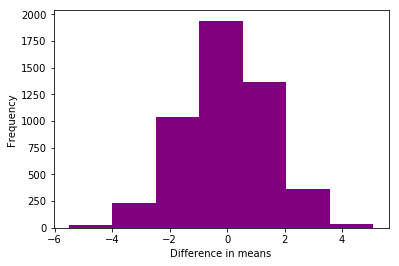

In [11]:
print("\nFIRST 3 BOOTSTRAPPED SAMPLES for caffiene and sleep (at K=5000)")

# Empirical sampling distribution from hybrid bootstrap-randomization
bootstrap_diff_sample_means = bootstrap_two_sample(df3.Words, len(caff_data), len(sleep_data))

print("\nSUMMARY STATS ON DISTRIBUTION OF SAMPLES MEAN DIFFERENCE")
print(bootstrap_diff_sample_means.describe())

ax = bootstrap_diff_sample_means.plot.hist(bins=7, color='purple')
ax.set_xlabel("Difference in means")

c1 = bootstrap_diff_sample_means.quantile(0.025)
c2 = bootstrap_diff_sample_means.quantile(0.975)

p = len(bootstrap_diff_sample_means.abs()[lambda x: x>=math.fabs(diff_mean)])/len(bootstrap_diff_sample_means)

print("Critical Values:", c1, ",", c2, "\nSample Result (Test statistic θ - Mean difference):", diff_mean, "p:", p)

The Sample Result falls outside the acceptance region and the p-value is lower than the significance level. Hence, we can reject the null hypothesis that the mean number of words for caffiene and sleep are not significantly different.